In [19]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Login
DbUser = 'root'
DbPassword = '?????'
DbHost = 'localhost'
DbPort = '3306'
DbName = 'eCommerceDb'

# Engine
engine = create_engine(f"mysql+mysqlconnector://{DbUser}:{DbPassword}@{DbHost}:{DbPort}/{DbName}")

### Insight 1: Customer Distribution by Region

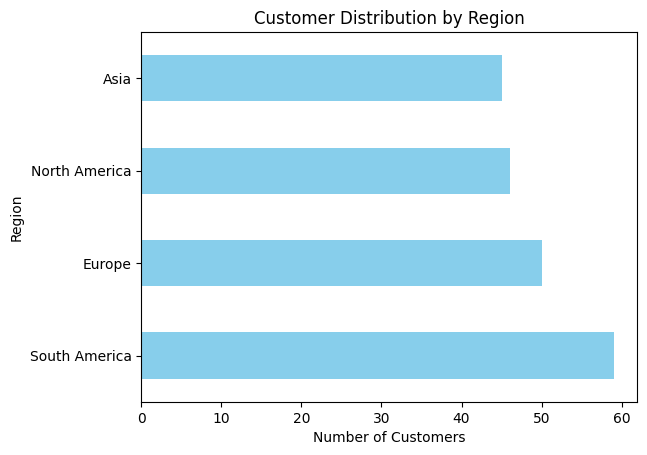

In [20]:
query = """
    SELECT Region, COUNT(CustomerID) AS TotalCustomers
    FROM Customers
    GROUP BY Region
    ORDER BY TotalCustomers DESC;
"""
df = pd.read_sql(query, con=engine)

df.plot(kind="barh", x="Region", y="TotalCustomers", color="skyblue", legend=False)
plt.xlabel("Number of Customers")
plt.ylabel("Region")
plt.title("Customer Distribution by Region")
plt.show()

### Insight 2: Monthly Revenue Trend

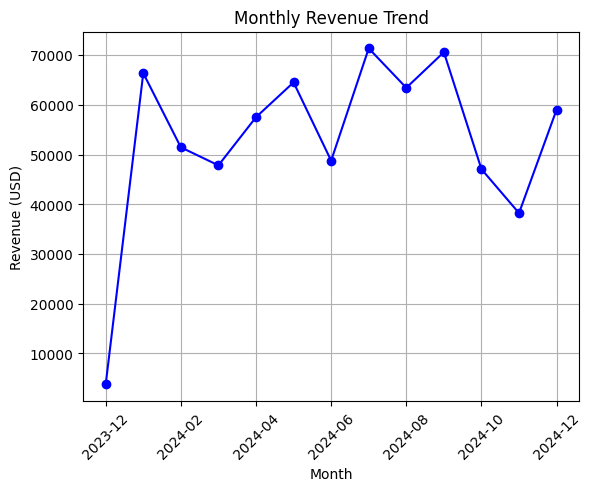

In [21]:
query = """
SELECT DATE_FORMAT(TransactionDate, '%Y-%m') AS YearMonth, SUM(TotalValue) AS TotalRevenue
FROM MasterTransactions
GROUP BY YearMonth
ORDER BY YearMonth;
"""
df = pd.read_sql(query, con=engine)

df.plot(kind="line", x="YearMonth", y="TotalRevenue", marker='o', color='b', legend=False)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.title("Monthly Revenue Trend")
plt.grid()
plt.show()

### Insight 3: Best Selling Products

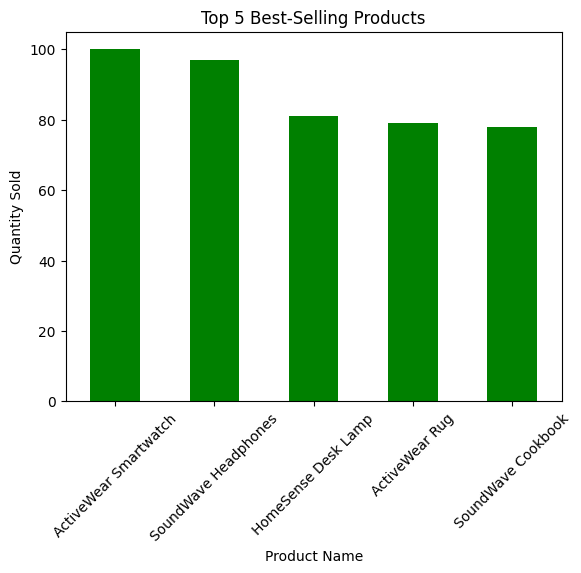

In [22]:
query = """
SELECT ProductName, SUM(Quantity) AS TotalSold
FROM MasterTransactions
GROUP BY ProductName
ORDER BY TotalSold DESC
LIMIT 5;
"""
df = pd.read_sql(query, con=engine)

df.plot(kind="bar", x="ProductName", y="TotalSold", color="green", legend=False)
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.title("Top 5 Best-Selling Products")
plt.xticks(rotation=45)
plt.show()

### Insight 4: High-Value Customers

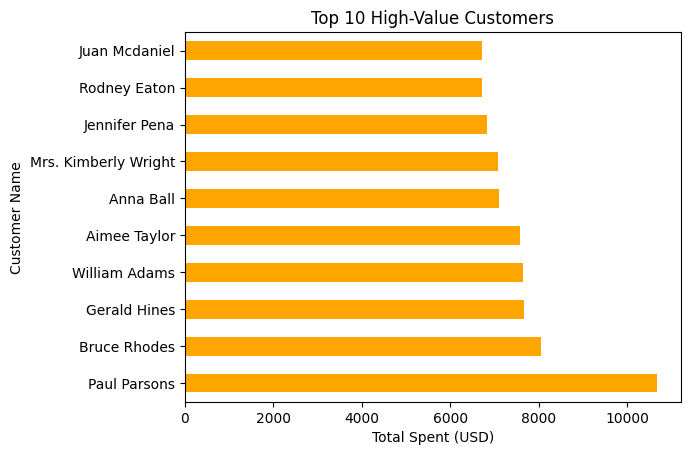

In [23]:
query = """
SELECT CustomerID, CustomerName, SUM(TotalValue) AS TotalSpent
FROM MasterTransactions
GROUP BY CustomerID, CustomerName
ORDER BY TotalSpent DESC
LIMIT 10;
"""
df = pd.read_sql(query, con=engine)

df.plot(kind="barh", x="CustomerName", y="TotalSpent", color="orange", legend=False)
plt.xlabel("Total Spent (USD)")
plt.ylabel("Customer Name")
plt.title("Top 10 High-Value Customers")
plt.show()

### Insight 5: Most Popular Product Categories by Region

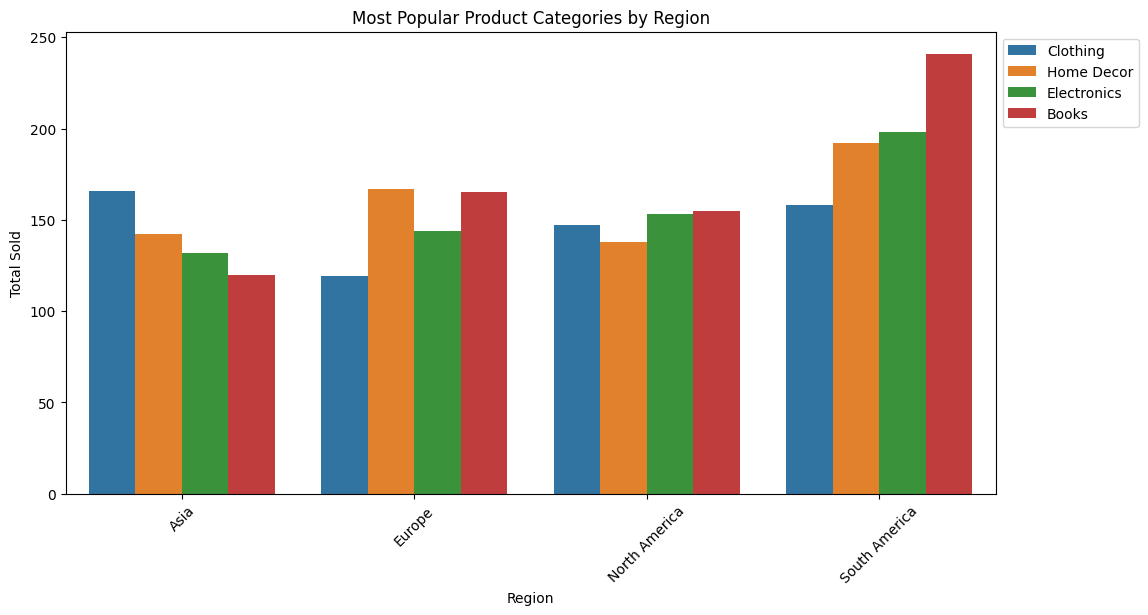

In [28]:
query = """
SELECT Region, Category, SUM(Quantity) AS TotalSold
FROM MasterTransactions
GROUP BY Region, Category
ORDER BY Region, TotalSold DESC;
"""
df = pd.read_sql(query, con=engine)

plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="TotalSold", hue="Category", data=df)
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Total Sold")
plt.title("Most Popular Product Categories by Region")
plt.legend(bbox_to_anchor=(1,1))
plt.show()